# Access to projecte_collab data, Jupyter notebook version

We begin by pointing the URLs to two files from the *projecte_collab_dades* 
repository. Station AWRD is used to provide data for temperature and 
relative humidity. In this example, data from August (month = 08) 2019.

In [1]:
import urllib
import codecs
import csv
import matplotlib.pyplot as plt

url_t = "https://raw.githubusercontent.com/alanwardubuntu/projecte_collab_dades/master/data/AWRD-2019-08-TEMP.csv"
url_h = "https://raw.githubusercontent.com/alanwardubuntu/projecte_collab_dades/master/data/AWRD-2019-08-RHUM.csv"

We open a stream to the data file, using the urllib library. We 
then create a CSV format reader to pull in temperature data and 
construct the x[] (time) and y_t[] (temperature) arrays.

In [2]:
f = urllib.request.urlopen(url_t)
reader = csv.reader(codecs.iterdecode(f, 'utf-8'), delimiter=',')

x = []
y_t = []
t = 0.0
dt = 1.0 / 24.0 / 6.0
min_t = 100
for row in reader:
	t += dt
	value = float(row[6])
	x.append(t)
	y_t.append(value)
	if min_t > value:
		min_t = value

f.close()

We proceed in the same way for the second file, containing 
relative humidity.

In [3]:
f = urllib.request.urlopen(url_h)
reader = csv.reader(codecs.iterdecode(f, 'utf-8'), delimiter=',')

y_h = []
min_h = 100
for row in reader:
	value = float(row[6])
	y_h.append(value)
	if min_h > value:
		min_h = value 

f.close()

We can now use the data to plot the graph. Two subgraphs are used, 
sharing a common x-axis (time, in days). 

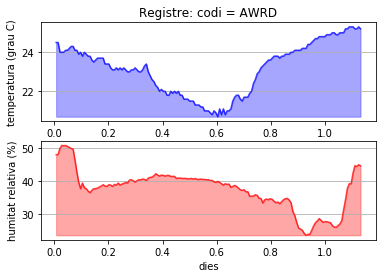

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].set_title("Registre: codi = AWRD")
axes[1].set_xlabel("dies")

axes[0].plot(x, y_t, 'b', alpha=0.75)
axes[0].fill_between(x, min_t, y_t, color='blue', alpha=0.35) 
axes[1].plot(x, y_h, 'r', alpha=0.75)
axes[1].fill_between(x, min_h, y_h, color='red', alpha=0.35)

axes[0].set_ylabel("temperatura (grau C)")
axes[1].set_ylabel("humitat relativa (%)")
axes[0].yaxis.grid()
axes[1].yaxis.grid()

plt.show()

Python program to pull temperature and relative humidity data
from the projecte_collab_dades repository CSV files.

Python 3 version, adapted for Jupyter.

Written by Alan Ward, (C) 2019. This software is provided for 
free, but alsolutely no warranties are offered. Use at your 
own risk. It is released under Creative Commons Share-Alike 
No-Commercial Licence version 3.0 (CC BY-NC-SA 3.0). Basically, you can:

- Use this program freely for non-commercial purposes.
- Use this program and all data freely for educational/investigation.
- If you do publish software that is derived from this, or scientific 
communications, then please do cite the original project.

The full text of this licence may be found here: https://creativecommons.org/licenses/by-nc-sa/3.0/
